In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
Boston =datasets.load_boston()
type(Boston)
print(Boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [9]:
Boston.feature_names
x=Boston.data
y=Boston.target
df=pd.DataFrame(x,columns=Boston.feature_names)

In [10]:
print(df.head())
type(x)
df.describe()
df.info()


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64


In [11]:
nu_rooms=x[:,5]
nu_rooms=nu_rooms.reshape(-1,1)
print(nu_rooms.shape)
y=y.reshape(-1,1)

(506, 1)


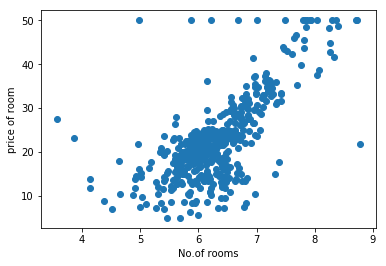

In [12]:
plt.scatter(nu_rooms,y)
plt.xlabel('No.of rooms')
plt.ylabel('price of room')
plt.show()

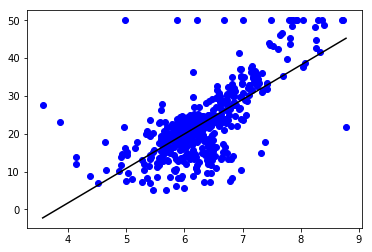

In [13]:
#Liniear modelling
from sklearn import linear_model
reg =linear_model.LinearRegression()
reg.fit(nu_rooms,y)
#Prediction
predict_=np.linspace(min(nu_rooms),max(nu_rooms)).reshape(-1,1)
plt.scatter(nu_rooms,y,color='blue')
plt.plot(predict_,reg.predict(predict_),color='black')
plt.show()

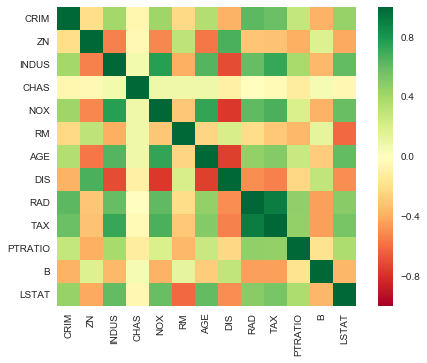

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [15]:
#Regression with split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
Reg1 =linear_model.LinearRegression()
Reg1.fit(x_train,y_train)
y_pred=Reg1.predict(x_test)
Reg1.score(x_test,y_test) #R^2
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(354, 13)
(354, 1)
(152, 13)
(152, 1)


In [13]:
#rmse calc
from sklearn.metrics import mean_squared_error 
rmse =mean_squared_error(y_test,y_pred)
rmse1=np.square(rmse)
print(rmse1)

463.981032153


In [17]:
#Cross_validation
from sklearn.model_selection import cross_val_score
reg_2 =linear_model.LinearRegression()
cv_results =cross_val_score(reg_2,x,y,cv=5)
print(cv_results)
print(np.mean(cv_results))

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
0.350741350933


In [20]:
#regularization
#Ridge regression-OLS+SSE
from sklearn.linear_model import Ridge
Ridge =Ridge(alpha=0.1,normalize='TRUE') #All variables are same scale
Ridge.fit(x_train,y_train)
Rigge_predict=Ridge.predict(x_test)
Ridge.score(x_test,y_test)




0.69955650271004211

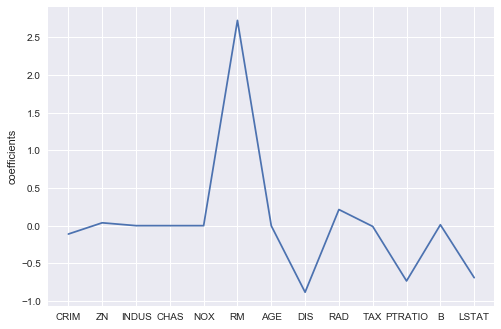

In [27]:
#Lasso - SSE+ ABSOLUTE ERROR
#Used for imporatant feature selection
from sklearn.linear_model import Lasso
names=Boston.feature_names
lasso=Lasso(alpha=0.5)
lasso_coeef=lasso.fit(x_train,y_train).coef_
_=plt.plot(range(len(names)),lasso_coeef)
_=plt.xticks(range(len(names)),names)
_=plt.ylabel('coefficients')
plt.show()
#RM is imp variable

In [25]:
#Hyper parameter tuning and selection of alpha
#Selection of alpha is based on CV and ridge regression
 Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores ))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores ))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

#def display_plot(cv_scores, cv_scores_std)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show() #

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
